In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Compare ENSEMBLE with and without CHIPRS

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [8]:
data = xr.open_dataset(os.path.join(dir_base, 'ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_NOCHIRPS.nc'))

lat_IM = data.lat.values
lon_IM = data.lon.values
lon2d_IM, lat2d_IM = np.meshgrid(lon_IM, lat_IM)

Mev_d_IM = data.Mev_d.values

del data

In [10]:
data = xr.open_dataset(os.path.join(dir_base, 'ITALY_ENSEMBLE_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson.nc'))

lat_CH = data.lat.values
lon_CH = data.lon.values
lon2d_CH, lat2d_CH = np.meshgrid(lon_CH, lat_CH)

Mev_d_CH = data.Mev_d.values

del data

In [35]:
lon_min, lon_max, lat_min, lat_max, area = 6.5, 19, 36.5, 48, 'ITALY'

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


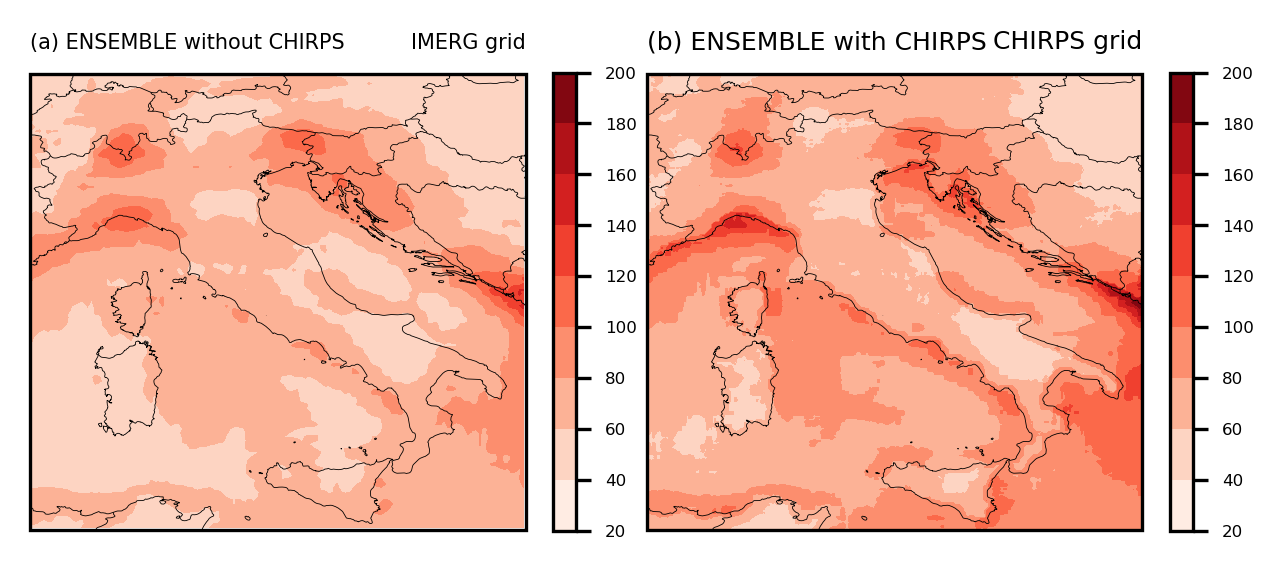

In [38]:
levels = np.arange(20,220,20)

cmap = plt.cm.Spectral_r
cmap = plt.cm.Reds

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,2),dpi=300)
gs = gridspec.GridSpec(1,2)

# =================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,color='black',zorder=4)
a1 = ax1.contourf(lon2d_IM, lat2d_IM, Mev_d_IM[0,:,:], cmap=cmap, levels=levels)

cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.042)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(a) ENSEMBLE without CHIRPS', loc='left', fontsize=5)
ax1.set_title('IMERG grid', loc='right', fontsize=5)

# =================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,color='black',zorder=4)
a1 = ax1.contourf(lon2d_CH, lat2d_CH, Mev_d_CH[0,:,:], cmap=cmap, levels=levels)

cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.042)
cbar.ax.tick_params(labelsize=4)

ax1.set_title('(b) ENSEMBLE with CHIRPS', loc='left', fontsize=6)
ax1.set_title('CHIRPS grid', loc='right', fontsize=6)

# ==============================================================================
# ==============================================================================
plt.subplots_adjust(wspace=0.13, hspace=0.15)